In [22]:
# set environment variables
import sys
import os
path = "/Users/israfelsalazar/Documents/deep-genomic.nosync/deep-genomic/"
sys.path.append(path)
os.environ["WORKDIR"] = path
from tqdm import tqdm

# common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch

# torch
from torch.utils.data import DataLoader

# local imports
from modeling.generator import Generator
from modeling.models import StudentTeacherModel
from datasets.genomic_environmental_dataset import load_data, load_conditions
from train.train_generative import set_seed

%load_ext autoreload
%autoreload 

data_dir = "../data/sim1"


set_seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
results_dir = "../experiment_outputs/norm_prior/"
model = StudentTeacherModel.from_pretrained(results_dir)

2022-06-24 11:10:40,626 - modeling.genomic_model - INFO - Loading model from {model_path}
2022-06-24 11:10:40,639 - modeling.genomic_model - INFO - Resolved config from ../experiment_outputs/norm_prior/config.json
2022-06-24 11:10:40,690 - modeling.genomic_model - INFO - Loaded weights from ../experiment_outputs/norm_prior/pytorch_model.bin


In [24]:
generator = Generator(model, ["var_current.csv"], data_dir)

In [20]:
c_current = torch.tensor(load_conditions(["var_current.csv"],data_dir, True),dtype=torch.float)
c_future = torch.tensor(load_conditions(["var_future.csv"],data_dir, True),dtype=torch.float)

In [14]:
mu, logvar = model.prior(c_current)
pmu, plogvar = model.prior(c_future)

In [15]:
from datasets.utils import filter_by
mu_reconstructed = filter_by(mu.detach().numpy(), generator.population)
mu_generated = filter_by(pmu.detach().numpy(), generator.population)

In [26]:
r2, genomic_offset, fitness_offset, predicted_fitness = generator.compute_r2(qtls=False)

2022-06-24 11:11:04,859 - modeling.generator - INFO - R2: 0.1516112511295391
2022-06-24 11:11:04,859 - modeling.generator - INFO - R2: 0.1516112511295391
2022-06-24 11:11:04,859 - modeling.generator - INFO - R2: 0.1516112511295391
2022-06-24 11:11:04,859 - modeling.generator - INFO - R2: 0.1516112511295391


(2036, 180)
(100, 180)


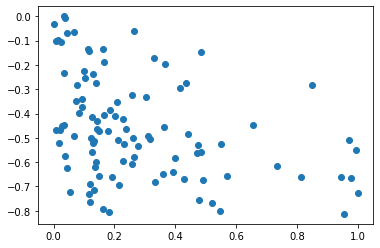

In [55]:
plt.scatter(genomic_offset, fitness_offset)

In [11]:
df = pd.read_csv('/Users/israfelsalazar/Documents/deep-genomic.nosync/deep-genomic/experiment_outputs/norm_prior/mat_result_python_3.csv', ' ')

/Users/israfelsalazar/Documents/deep-genomic.nosync/deep-genomic/deep-genomic-venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
df

,GeneticGap,RONA,GF,RDA
1,0.057199,0.290553,0.157637,0.015088
2,0.023267,0.244490,0.095596,0.009623
3,0.032493,0.264310,0.063580,0.011813
4,0.042882,0.246466,0.092474,0.013510
5,0.020943,0.262887,0.064646,0.009500
...,...,...,...,...
96,0.016001,0.247161,0.088487,0.008087
97,0.045465,0.266779,0.091761,0.013479
98,0.058571,0.290798,0.096676,0.015971
99,0.005803,0.202616,0.022188,0.005032


R2 cvae: 0.9447372408337256


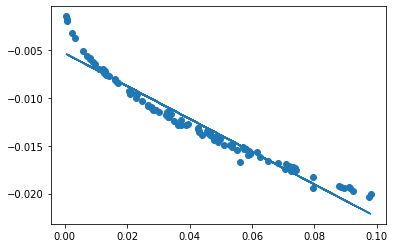

In [22]:
from sklearn.linear_model import LinearRegression
x = np.asarray(df['GeneticGap'])
y = -np.asarray(df['RDA'])
linear_model = LinearRegression().fit(x.reshape(-1, 1),y)
r2 = linear_model.score(x.reshape(-1, 1), y)
print(f"R2 cvae: {r2}")
predicted_fitness = linear_model.predict(x.reshape(-1, 1))
plt.scatter(x, y)
plt.plot(x, predicted_fitness)